# Plot Results

In [11]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import re

import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import  random
from random import randint

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import matplotlib
matplotlib.rcParams['text.usetex'] = True


In [12]:
def extract_numbers(input_string):
    numbers = re.findall(r'\d+\.\d+|\d+', input_string)
    numbers = [float(num) if '.' in num else int(num) for num in numbers]
    return numbers

In [13]:
dataset = 'Synthetic'
tnet_file1 = "./results/results_TNet.xlsx"
mtnet_file1 = "./results/results_Multitasking.xlsx"
advnet_file1 = "./results/results_Adversarial.xlsx"
kmm_file1 = "./results/results_KMM.xlsx"
kliep_file1 = "./results/results_KLIEP-T.xlsx"
impute_file1 = "./results/results_Imputation.xlsx"
ipw_file1 = "./results/results_IPW.xlsx"

# Comparision among standard practice and proposed solutions

### Average Performance Across all Settings

Combine data from scale as well as rate settings

In [14]:
# data from scale settings
# read all
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
# df['TNet-Censored'] = data_tnet1['Predicted Sensored']
# df['Censored'] = data_tnet1['Actual Sensored']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
# df['MTNet-Censored'] = data_MT['Predicted Sensored']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df

df_stdu = df[['Naive', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdu['Method'] = ['Naive' for i in range(len(df_stdu))]
df_stdu.rename(columns={'Naive': 'AUROC'}, inplace=True)

df_stdb = df[['Oracle', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdb['Method'] = ['Oracle' for i in range(len(df_stdb))]
df_stdb.rename(columns={'Oracle': 'AUROC'}, inplace=True)

df_mtnetc = df[['MTNet(C)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtnetc['Method'] = ['MTNet(C)' for i in range(len(df_mtnetc))]
df_mtnetc.rename(columns={'MTNet(C)': 'AUROC'}, inplace=True)
df_mtneti = df[['MTNet(I)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtneti['Method'] = ['MTNet(I)' for i in range(len(df_mtneti))]
df_mtneti.rename(columns={'MTNet(I)': 'AUROC'}, inplace=True)

df_tnet = df[['TNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_tnet['Method'] = ['TNet' for i in range(len(df_tnet))]
df_tnet.rename(columns={'TNet': 'AUROC'}, inplace=True)

df_adv = df[['AdvNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['AdvNet' for i in range(len(df_adv))]
df_adv.rename(columns={'AdvNet': 'AUROC'}, inplace=True)

df_kmm = df[['KMM', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP': 'AUROC'}, inplace=True)

df_ipw = df[['IPW', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_ipw['Method'] = ['IPW' for i in range(len(df_ipw))]
df_ipw.rename(columns={'IPW': 'AUROC'}, inplace=True)

df_impute = df[['Imputation', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_impute['Method'] = ['Imputation' for i in range(len(df_impute))]
df_impute.rename(columns={'Imputation': 'AUROC'}, inplace=True)

data = pd.concat([df_stdu, df_stdb, df_mtnetc, df_mtneti, df_tnet, df_adv, df_kmm, df_kliep, df_ipw, df_impute], axis=0, ignore_index=True).reset_index()

data = data.replace('AdvNet', 'DANN')
data = data.replace('MTNet(C)', 'MT-Naive')
data = data.replace('MTNet(I)', 'MT-Net')
data = data.replace('TNet', 'T-Net')

data


,index,AUROC,Dataset Size,Risk Rate,Censoring Rate,Method
0,0,0.913179,1000.0,0.05,0.05,Naive
1,1,0.899820,1000.0,0.05,0.05,Naive
2,2,0.932256,1000.0,0.05,0.05,Naive
3,3,0.882145,1000.0,0.05,0.05,Naive
4,4,0.908754,1000.0,0.05,0.05,Naive
...,...,...,...,...,...,...
12495,12495,0.684671,5000.0,0.40,0.40,Imputation
12496,12496,0.681415,5000.0,0.40,0.40,Imputation
12497,12497,0.685223,5000.0,0.40,0.40,Imputation
12498,12498,0.683663,5000.0,0.40,0.40,Imputation


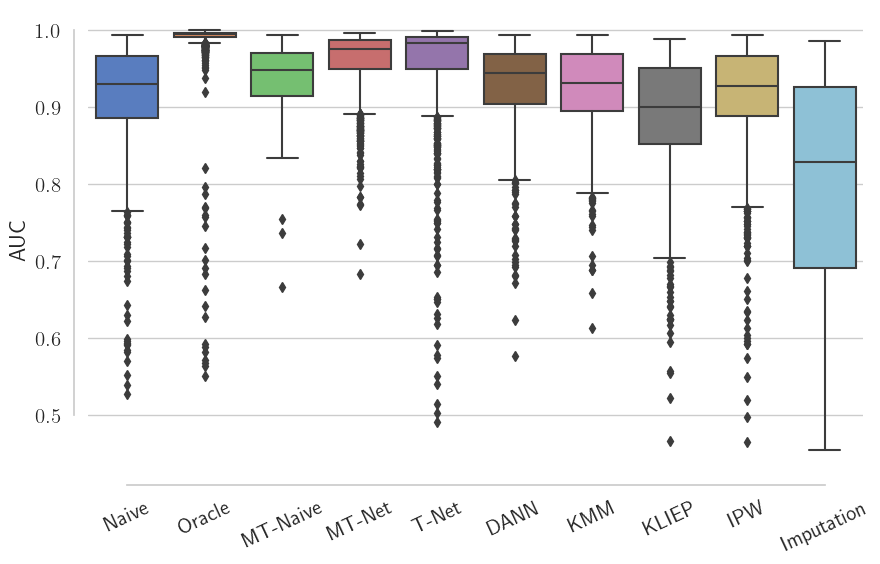

In [16]:
#########################################################
ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(10,6))
# sns.set(font_scale = 10)
# sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="whitegrid", palette="muted")
# sns.set(style="darkgrid")

# plot AUROC
p = sns.boxplot(x="Method", y="AUROC",
            palette=sns.color_palette(),
            data=data)
sns.despine(offset=10, trim=True)
# p.set_ylabel("AUROC", fontsize = 20)
# p.set_xlabel("% Irregularity", fontsize = 20)
# p.set_title("Plot", fontsize = 20)
# plt.legend(labels=["COPER","Perceiver","LSTM"], fontsize = 20)

# plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                 mode="expand", borderaxespad=0, ncol=3, frameon=False, fontsize=20)
# plt.legend(loc="lower left", frameon=True, fontsize=16)
# plt.xlabel('Model', fontsize=16)
ax.set(xlabel=None)
plt.grid(which='minor')
plt.ylabel('AUC', fontsize=16)
plt.xticks(fontsize=15, rotation=25)
plt.yticks(fontsize=15)#, ticks=np.arange(0.55, 1, step=0.05))
plt.savefig(dataset + '.pdf', dpi=300,bbox_inches='tight')

#######################################################################################

### Plot Censoring Prediction Performance of Proposed methods

In [17]:
# df_tnet = df[['TNet-Censored', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
# df_tnet['Method'] = ['TNet-Censored' for i in range(len(df_tnet))]
# df_tnet.rename(columns={'TNet-Censored': 'AUROC'}, inplace=True)

# df_mtnet = df[['MTNet-Censored', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
# df_mtnet['Method'] = ['MTNet-Censored' for i in range(len(df_mtnet))]
# df_mtnet.rename(columns={'MTNet-Censored': 'AUROC'}, inplace=True)

# data = pd.concat([df_mtnet, df_tnet], axis=0, ignore_index=True).reset_index().replace('MTNet-Censored', 'MTNet').replace('TNet-Censored', 'TNet')

# # data = data.loc[(data['Dataset Size']!=5000)]

# data

In [18]:
# #########################################################
# sheet_name = 'censoring'

# ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(10,6))
# # sns.set(font_scale = 10)
# # sns.set_theme(style="ticks", palette="pastel")
# sns.set_theme(style="whitegrid", palette="muted")
# # sns.set(style="darkgrid")

# # plot AUROC
# p = sns.boxplot(x="Method", y="AUROC",
#             palette=sns.color_palette(),
#             data=data)
# sns.despine(offset=10, trim=True)
# # p.set_ylabel("AUROC", fontsize = 20)
# # p.set_xlabel("% Irregularity", fontsize = 20)
# # p.set_title("Plot", fontsize = 20)
# # plt.legend(labels=["COPER","Perceiver","LSTM"], fontsize = 20)

# # plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
# #                 mode="expand", borderaxespad=0, ncol=3, frameon=False, fontsize=20)
# # plt.legend(loc="lower left", frameon=True, fontsize=16)
# # plt.xlabel('Model', fontsize=16)
# ax.set(xlabel=None)
# plt.ylabel('AUROC', fontsize=16)
# plt.xticks(fontsize=15, rotation=0)
# plt.yticks(fontsize=15)
# plt.savefig(sheet_name + '-AUROC.pdf', dpi=300,bbox_inches='tight')

# #######################################################################################

## Risk rate vs censoring rate

In [19]:
# read all and put in a format with method as a column and performance under AUROC
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
df['TNet-Censored'] = data_tnet1['C-Test AUROC']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
df['MTNet(I)-Censored'] = data_MT1['C-Test AUROC-U']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df

df = df.groupby(['Risk Rate', 'Censoring Rate'], as_index=False).mean().reset_index()
df = df.rename(columns={'AdvNet': 'DANN'})
df = df.rename(columns={'MTNet(C)': 'MT-Naive'})
df = df.rename(columns={'MTNet(I)': 'MT-Net'})
df = df.rename(columns={'TNet': 'T-Net'})
df = df.rename(columns={'MTNet(I)-Censored': 'MT-Net-Censored'})
df = df.rename(columns={'TNet-Censored': 'T-Net-Censored'})

df

,index,Risk Rate,Censoring Rate,Naive,Oracle,T-Net,T-Net-Censored,MT-Net,MT-Naive,MT-Net-Censored,DANN,KMM,KLIEP,IPW,Imputation,Dataset Size
0,0,0.05,0.05,0.924881,0.976237,0.921355,0.882602,0.937671,0.941482,0.864445,0.899368,0.937242,0.841102,0.906904,0.901353,3000.0
1,1,0.05,0.10,0.909442,0.988213,0.918237,0.936461,0.926183,0.941304,0.920955,0.870870,0.932473,0.846839,0.889089,0.869993,3000.0
2,2,0.05,0.20,0.859338,0.971501,0.873839,0.958008,0.894955,0.931842,0.932001,0.918396,0.865581,0.822351,0.848980,0.690118,3000.0
3,3,0.05,0.30,0.798882,0.966569,0.873328,0.970232,0.884360,0.898601,0.954404,0.893748,0.841979,0.789919,0.777356,0.666235,3000.0
4,4,0.05,0.40,0.760306,0.978610,0.851488,0.977254,0.887771,0.866711,0.971691,0.871145,0.787124,0.736394,0.751290,0.581867,3000.0
5,5,0.10,0.05,0.955797,0.986237,0.964074,0.877709,0.967249,0.964788,0.867500,0.944173,0.967059,0.942321,0.959723,0.935956,3000.0
6,6,0.10,0.10,0.929334,0.968618,0.951498,0.904552,0.950916,0.949443,0.884305,0.941346,0.963880,0.925079,0.936304,0.876371,3000.0
7,7,0.10,0.20,0.900434,0.993499,0.956672,0.970217,0.954410,0.947481,0.948079,0.943946,0.915525,0.867606,0.897140,0.764001,3000.0
8,8,0.10,0.30,0.865021,0.968996,0.914473,0.970662,0.943940,0.929325,0.955171,0.928481,0.903173,0.830475,0.876355,0.717090,3000.0
9,9,0.10,0.40,0.816854,0.954487,0.913167,0.981174,0.941740,0.894725,0.968077,0.918800,0.853816,0.795331,0.836265,0.605525,3000.0


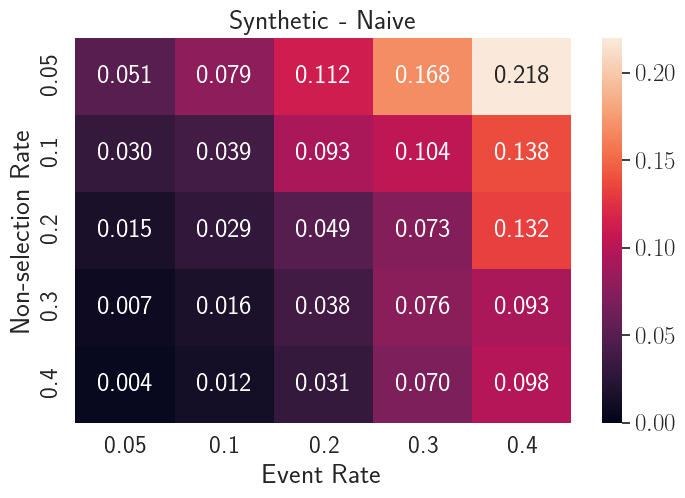

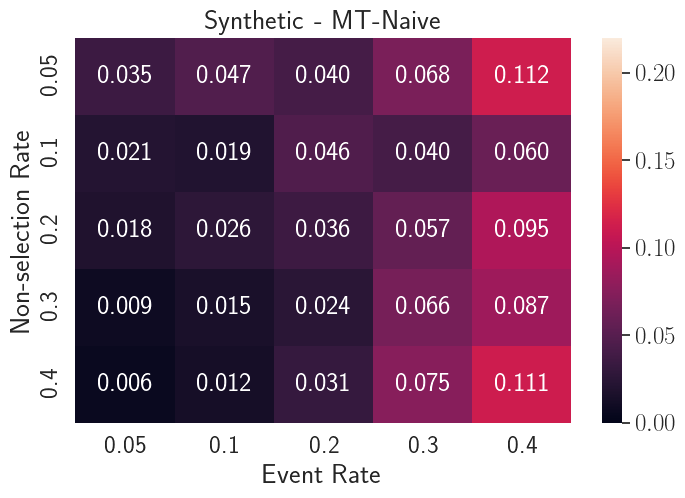

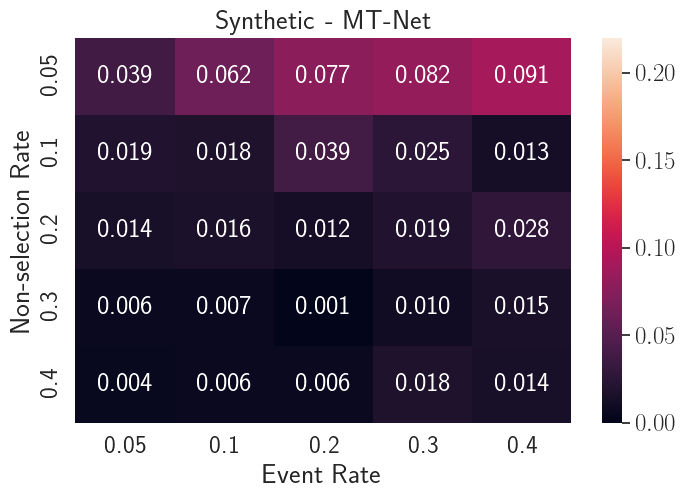

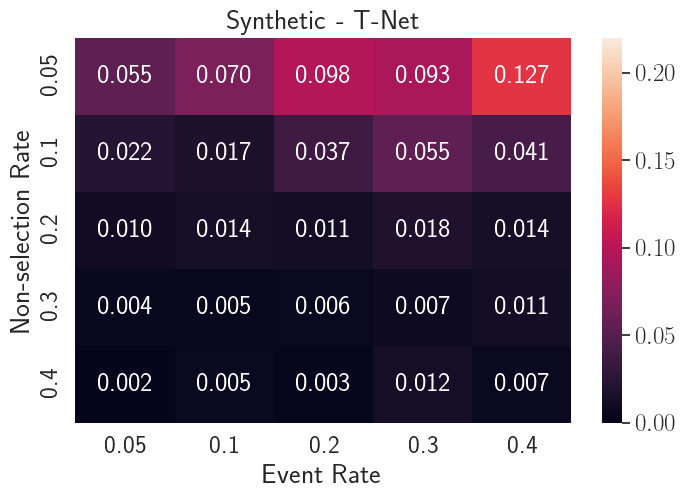

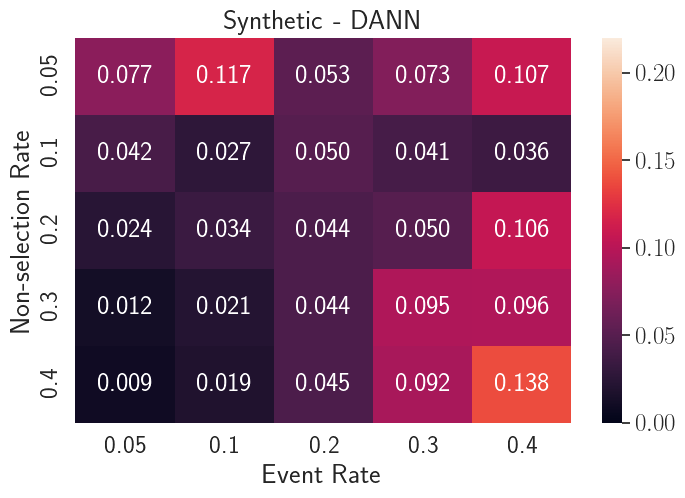

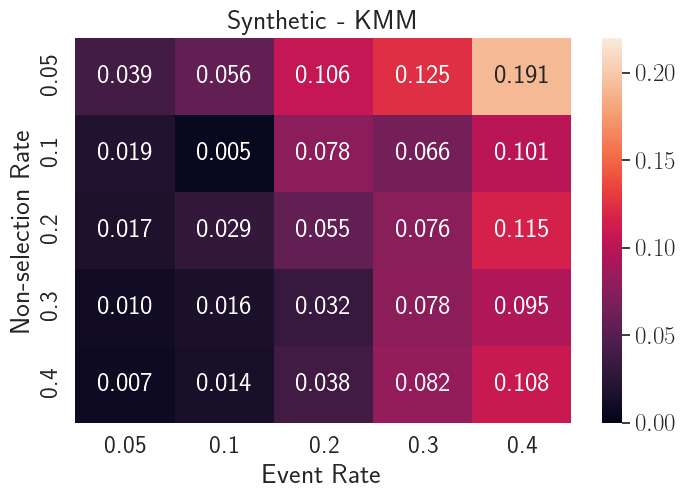

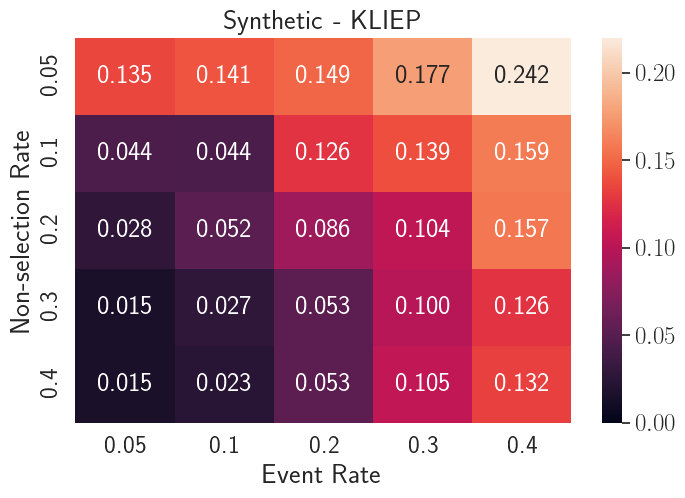

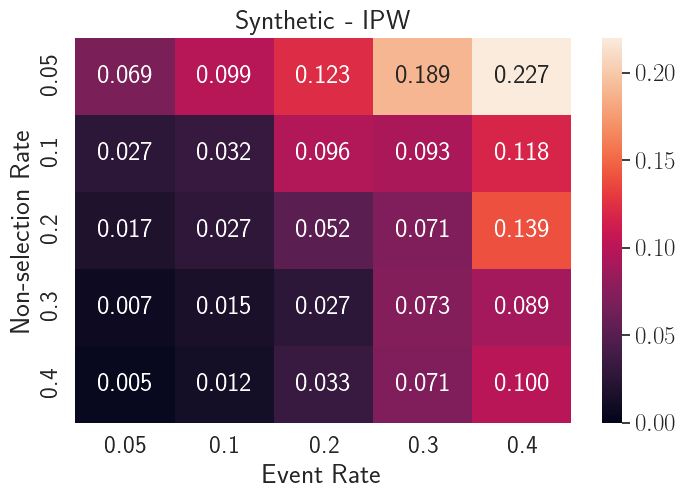

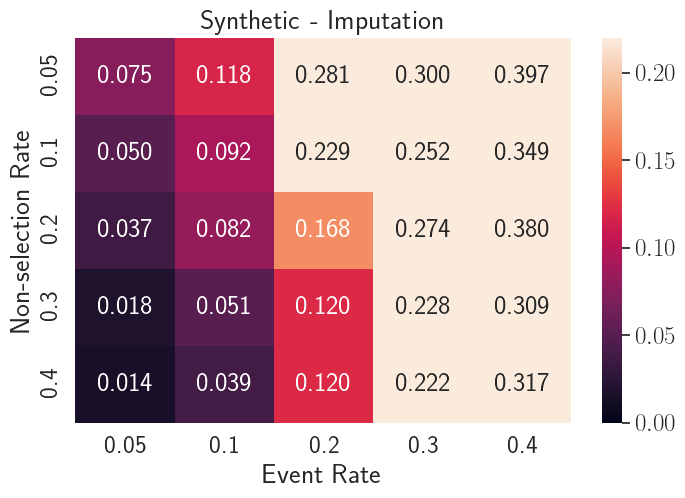

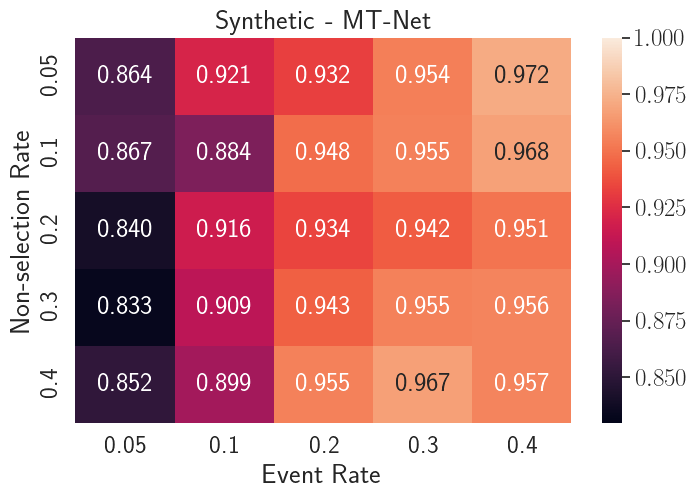

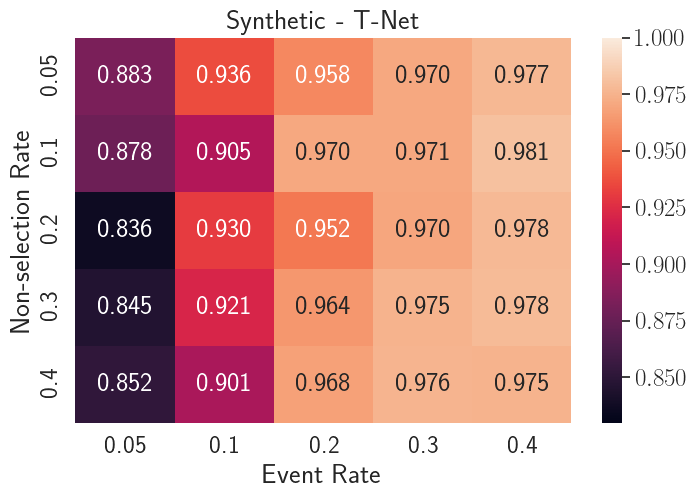

In [20]:
#######################################################################################

def plot_risk_vs_censoring_R(data, sheet_name, method, vmin, vmax):
    # print(data)
    data = data[[method, 'Oracle', 'Censoring Rate', 'Risk Rate']]
    data['AUROC'] = data['Oracle'] - data[method]
    # data['Censored'] = data[method+'-Censored']-data['Censored']
    data = data.drop([method, 'Oracle'], axis=1)
    # plot AUROC
    ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(8,5))
    # sns.set(font_scale = 10)
    # sns.set_theme(style="ticks", palette="pastel")
    sns.set_theme(style="whitegrid", palette="muted")
    df1 = data.pivot(index="Risk Rate", columns="Censoring Rate", values="AUROC")
    ax = sns.heatmap(df1, vmin=vmin, vmax=vmax, annot=True, fmt=f'.{3}f', annot_kws={"size": 19, "ha": 'center'})
    cax = ax.figure.axes[-1]
    cax.tick_params(labelsize=18)

    # plt.axhline(y=0, color='r', linestyle='--', label='Horizontal Line at y=6')
    # plt.legend(loc="lower right", frameon=True, fontsize=16)
    # sns.move_legend(ax, "center")
    plt.xlabel('Event Rate', fontsize=20)
    # ax.set(xlabel=None)
    plt.ylabel('Non-selection Rate', fontsize=20)
    # ax.set_ylim([.45, .55])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(sheet_name + ' - ' + method, fontsize=20)
    # Turns off grid on the left Axis.
    ax.grid(False)

    plt.savefig(sheet_name + '-R-' + method + '.pdf',dpi=300, bbox_inches='tight')


def plot_risk_vs_censoring_C(data, sheet_name, method, vmin, vmax):
    data = data[[method +'-Censored', 'Censoring Rate', 'Risk Rate']]
    data['AUROC'] = data[method +'-Censored']
    data = data.drop([method +'-Censored'], axis=1)
    # plot AUROC
    ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(8,5))
    # sns.set(font_scale = 10)
    # sns.set_theme(style="ticks", palette="pastel")
    sns.set_theme(style="whitegrid", palette="muted")
    df1 = data.pivot(index="Risk Rate", columns="Censoring Rate", values="AUROC")
    ax = sns.heatmap(df1, vmin=vmin, vmax=vmax, annot=True, fmt=f'.{3}f', annot_kws={"size": 19, "ha": 'center'})
    ax.tick_params(labelsize=18)
    cax = ax.figure.axes[-1]
    cax.tick_params(labelsize=18)


    # plt.axhline(y=0, color='r', linestyle='--', label='Horizontal Line at y=6')
    # plt.legend(loc="lower right", frameon=True, fontsize=16)
    # sns.move_legend(ax, "center")
    plt.xlabel('Event Rate', fontsize=20)
    # ax.set(xlabel=None)
    plt.ylabel('Non-selection Rate', fontsize=20)
    # ax.set_ylim([.45, .55])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(sheet_name + ' - ' + method, fontsize=20)
    # Turns off grid on the left Axis.
    ax.grid(False)

    plt.savefig(sheet_name + '-C-' + method + '.pdf',dpi=300, bbox_inches='tight')

#######################################################################################

# plot_risk_vs_censoring_R(df, dataset, 'Naive')
# plot_risk_vs_censoring_R(df, dataset, 'MT-Naive')
# plot_risk_vs_censoring_R(df, dataset, 'MT-Net')
# plot_risk_vs_censoring_R(df, dataset, 'T-Net')
# plot_risk_vs_censoring_R(df, dataset, 'DANN')
# plot_risk_vs_censoring_R(df, dataset, 'KMM')
# plot_risk_vs_censoring_R(df, dataset, 'KLIEP')
# plot_risk_vs_censoring_R(df, dataset, 'IPW')
# plot_risk_vs_censoring_R(df, dataset, 'Imputation')

# plot_risk_vs_censoring_C(df, dataset, 'MT-Net')
# plot_risk_vs_censoring_C(df, dataset, 'T-Net')

plot_risk_vs_censoring_R(df, dataset, 'Naive', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'MT-Naive', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'MT-Net', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'T-Net', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'DANN', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'KMM', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'KLIEP', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'IPW', vmin=0, vmax=0.22)
plot_risk_vs_censoring_R(df, dataset, 'Imputation', vmin=0, vmax=0.22)

plot_risk_vs_censoring_C(df, dataset, 'MT-Net', vmin=0.83, vmax=1.0)
plot_risk_vs_censoring_C(df, dataset, 'T-Net', vmin=0.83, vmax=1.0)

# Study effect of dataset size

In [21]:
# read all
data_tnet1 = pd.read_excel(tnet_file1, sheet_name=0)
data_MT1 = pd.read_excel(mtnet_file1, sheet_name=0)
data_Adv1 = pd.read_excel(advnet_file1, sheet_name=0)
data_kmm1 = pd.read_excel(kmm_file1, sheet_name=0)
data_kliep1 = pd.read_excel(kliep_file1, sheet_name=0)
data_ipw1 = pd.read_excel(ipw_file1, sheet_name=0)
data_imp1 = pd.read_excel(impute_file1, sheet_name=0)

# combine methods into one dataframe
df = pd.DataFrame()
df['Naive'] = data_tnet1['R-Test AUROC-U']
df['Oracle'] = data_tnet1['R-Test AUROC-B']
df['TNet'] = data_tnet1['R-Test-2M']
# df['TNet-Censored'] = data_tnet1['Predicted Sensored']
# df['Censored'] = data_tnet1['Actual Sensored']
df['N'] = data_tnet1['Size']

df['MTNet(I)'] = data_MT1['Test AUROC-Multitasking']
df['MTNet(C)'] = data_MT1['Test AUROC-U']
# df['MTNet-Censored'] = data_MT['Predicted Sensored']

df['AdvNet'] = data_Adv1['Test AUROC-U']
# df['AdvNet-Censored'] = data_Adv['Predicted Sensored']

df['KMM'] = data_kmm1['KMM Test AUROC']
df['KLIEP'] = data_kliep1['KLIEP Test AUROC']

df['IPW'] = data_ipw1['R-Test AUROC']
df['Imputation'] = data_imp1['R-Test AUROC']

df[['Dataset Size', 'Risk Rate', 'Censoring Rate']] = df['N'].apply(lambda x: pd.Series(extract_numbers(x)))
df = df.drop(['N'], axis=1)

df

df_stdu = df[['Naive', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdu['Method'] = ['Naive' for i in range(len(df_stdu))]
df_stdu.rename(columns={'Naive': 'AUROC'}, inplace=True)

df_stdb = df[['Oracle', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_stdb['Method'] = ['Oracle' for i in range(len(df_stdb))]
df_stdb.rename(columns={'Oracle': 'AUROC'}, inplace=True)

df_mtnetc = df[['MTNet(C)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtnetc['Method'] = ['MTNet(C)' for i in range(len(df_mtnetc))]
df_mtnetc.rename(columns={'MTNet(C)': 'AUROC'}, inplace=True)
df_mtneti = df[['MTNet(I)', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_mtneti['Method'] = ['MTNet(I)' for i in range(len(df_mtneti))]
df_mtneti.rename(columns={'MTNet(I)': 'AUROC'}, inplace=True)

df_tnet = df[['TNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_tnet['Method'] = ['TNet' for i in range(len(df_tnet))]
df_tnet.rename(columns={'TNet': 'AUROC'}, inplace=True)

df_adv = df[['AdvNet', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_adv['Method'] = ['AdvNet' for i in range(len(df_adv))]
df_adv.rename(columns={'AdvNet': 'AUROC'}, inplace=True)

df_kmm = df[['KMM', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kmm['Method'] = ['KMM' for i in range(len(df_kmm))]
df_kmm.rename(columns={'KMM': 'AUROC'}, inplace=True)

df_kliep = df[['KLIEP', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_kliep['Method'] = ['KLIEP' for i in range(len(df_kliep))]
df_kliep.rename(columns={'KLIEP': 'AUROC'}, inplace=True)

df_ipw = df[['IPW', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_ipw['Method'] = ['IPW' for i in range(len(df_ipw))]
df_ipw.rename(columns={'IPW': 'AUROC'}, inplace=True)

df_impute = df[['Imputation', 'Dataset Size', 'Risk Rate', 'Censoring Rate']]
df_impute['Method'] = ['Imputation' for i in range(len(df_impute))]
df_impute.rename(columns={'Imputation': 'AUROC'}, inplace=True)

data = pd.concat([df_stdu, df_stdb, df_mtnetc, df_mtneti, df_tnet, df_adv, df_kmm, df_kliep, df_ipw, df_impute], axis=0, ignore_index=True).reset_index()

# data = data.loc[(data['Dataset Size']!=5000)]

data = data.replace('AdvNet', 'DANN')
data = data.replace('MTNet(C)', 'MT-Naive')
data = data.replace('MTNet(I)', 'MT-Net')
data = data.replace('TNet', 'T-Net')

data

,index,AUROC,Dataset Size,Risk Rate,Censoring Rate,Method
0,0,0.913179,1000.0,0.05,0.05,Naive
1,1,0.899820,1000.0,0.05,0.05,Naive
2,2,0.932256,1000.0,0.05,0.05,Naive
3,3,0.882145,1000.0,0.05,0.05,Naive
4,4,0.908754,1000.0,0.05,0.05,Naive
...,...,...,...,...,...,...
12495,12495,0.684671,5000.0,0.40,0.40,Imputation
12496,12496,0.681415,5000.0,0.40,0.40,Imputation
12497,12497,0.685223,5000.0,0.40,0.40,Imputation
12498,12498,0.683663,5000.0,0.40,0.40,Imputation


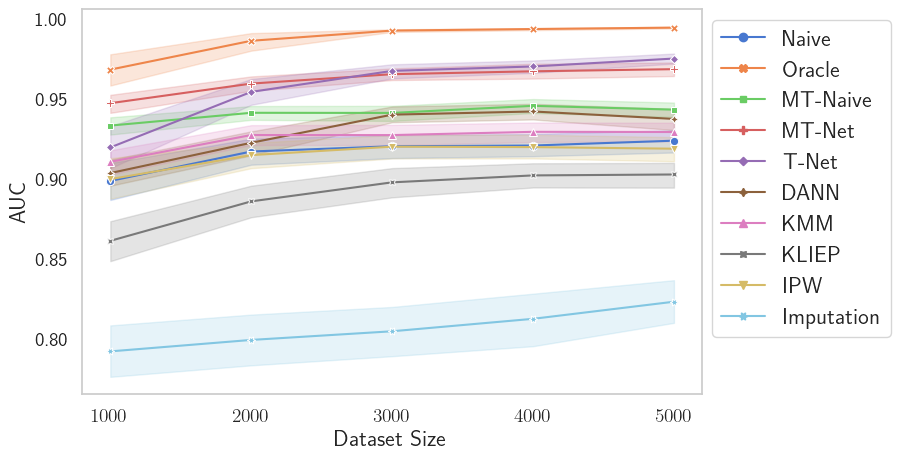

In [22]:
sheet_name = dataset + '-scale'
xticks = [1000, 2000, 3000, 4000, 5000]
# plot AUPRC
ig, ax = plt.subplots(1, 1,gridspec_kw={'wspace': 0.4},figsize=(8,5))
# sns.set(font_scale = 10)
# sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.lineplot( x = "Dataset Size", 
			y = "AUROC",
			hue = "Method",
			data = data, style="Method",
    markers=True, dashes=False)

ax.legend_.set_title(None)
# plt.axhline(y=0, color='r', linestyle='--', label='Horizontal Line at y=6')
# plt.legend(loc="lower right", frameon=True, fontsize=16, ncol=3)
plt.legend(loc='upper center', bbox_to_anchor=(1.16, 1), ncol=1, fontsize=16)  # Adjust bbox_to_anchor for precise positioning
# sns.move_legend(ax, "center")
plt.xlabel('Dataset Size', fontsize=16)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:.2f}"))
# ax.set(xlabel=None)
plt.ylabel('AUC', fontsize=16)
# ax.set_ylim([.45, .55])
plt.xticks(xticks, fontsize=14)
plt.yticks(fontsize=14)
# Turns off grid on the left Axis.
ax.grid(False)

plt.savefig(sheet_name + '.pdf',dpi=300, bbox_inches='tight')